In [1]:
%load_ext autoreload
%autoreload 2

import builtins
import IPython.lib.deepreload
builtins.reload = IPython.lib.deepreload.reload # type: ignore

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from swcgeom import Tree
from swcgeom.core.swc_utils import is_binary_tree
from swcgeom.analysis import draw
from swcgeom.transforms import PointsToCuntzMST

(<Figure size 640x480 with 2 Axes>, <Axes: >)

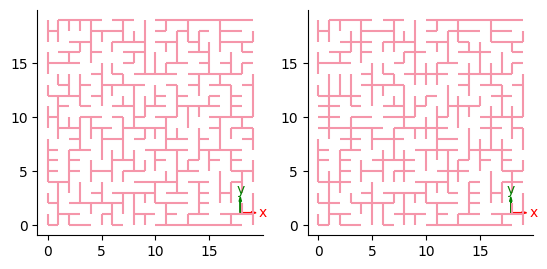

In [3]:
n = 20
x, y = np.mgrid[:n, :n]
z = np.zeros((n, n))
xyz = np.stack([x, y, z], axis=2).reshape(-1, 3)
np.random.shuffle(xyz)

mst_2 = PointsToCuntzMST(furcations=2)(xyz, soma=(0, 0, 0))
mst_k = PointsToCuntzMST(furcations=-1)(xyz, soma=(0, 0, 0))

fig, (ax0, ax1) = plt.subplots(1, 2)
draw(mst_2, ax=ax0)
draw(mst_k, ax=ax1)

(<Figure size 640x480 with 2 Axes>, <Axes: >)

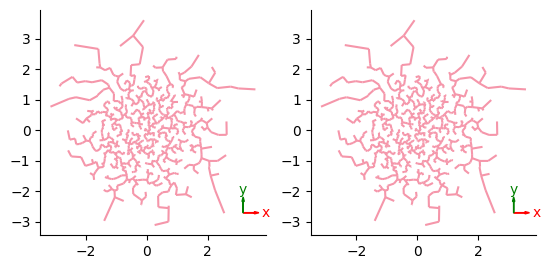

In [6]:
n = 1000
xy = np.random.randn(n, 2)
xyz = np.concatenate([xy, np.zeros((n, 1))], axis=1)

mst_2 = PointsToCuntzMST(furcations=2)(xyz, soma=(0, 0, 0))
mst_k = PointsToCuntzMST(furcations=-1)(xyz, soma=(0, 0, 0))

fig, (ax0, ax1) = plt.subplots(1, 2)
draw(mst_2, ax=ax0)
draw(mst_k, ax=ax1)

(<Figure size 640x480 with 3 Axes>, <Axes: >)

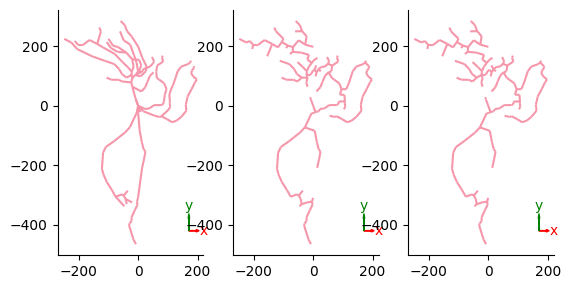

In [7]:
tree = Tree.from_swc("./data/101711-10_4p5-of-16_initial.CNG.swc")
xyz = tree.xyz()

mst_2 = PointsToCuntzMST(furcations=2)(xyz)
mst_k = PointsToCuntzMST(furcations=-1)(xyz)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
draw(tree, ax=ax0)
draw(mst_2, ax=ax1)
draw(mst_k, ax=ax2)